### Irène Marchand

# Personnal project: The Cox model

 Since survival analysis is a multi-disciplinary field, it is impossible to be exhaustive. Consequently, I chose to talk about the main concepts of survival analysis and to deepen the Cox model.

$\textbf{Sommary}:$  

$\textbf{I- Introduction:}$ 

1-Introduction  
2-Basics of survival analysis  
......2.1-The survival function S  
......2.2-The cumulative distribution function  
......2.3-The probability density  
......2.4-The hazard rate and the cumulative hazard rate  
......2.5-Type of censoring  

$\textbf{II- The non parametric estimation}$  

1-The Kaplan-Meier estimator  
2-The Nelson-Aaden estimator  
3-Other estimators  
......3.1-The Breslow estimator  
......3.2-The Harrington-Fleming estimator  
4-The acturial method   
5-Standard Errors and Confidence Interval  

$\textbf{III- Simulation on breast cancer data}$ 
1-Exploring the data  
......1.1-Censored data  
2-The Kaplan-Meier estimator  
......2.1-The cumulative hazard function  
3-Observe the impact of the variables  
4-Fitting a distribution  

$\textbf{IV- Semi-parametric model: The Cox proportional hazard model}$  
1-Proportional hazard model  
2-Definition of the Cox model  
3-Interpretation of the coefficients  
4-Estimation and test  
......4.1-Cox partial likelihodd  
......4.2-Tests  
.........4.2.1-The Wals test  
.........4.2.2-The likelihood test  
.........4.2.3-The score test  

$\textbf{V- Compute the Cox model in R: simulation on lung cancer data}$  
1-Exploring the data  
2-The Coxph function  
3-Multivariate Cox regression analysis  
4-Visualizing the estimated distribution of survival times  

$\textbf{VI- The parametrics distributions}$  
1-The Exponential distribution  
2-The Weibull distribution  
3-The Gamma distribution  
4-Other usual distributions in survival analysis  

## I-Introduction

## 1-Introduction

The term $\textbf{survival time}$ refers to the time elapsed until the occurrence of a specific event.  
The event studied (commonly called death) is the transition between two states (commonly called living and deaths).  
However, the terminal event is not necessarily death: it can be the appearance of a disease (for example, the time before relapse or rejection of a transplantation), healing (time between diagnosis and recovery), the failure of a machine.  
The analysis of the survival data is the study of the delay of the occurrence of this event.  
In the biomedical field, these durations are studied under the form of cohort surveys (follow-up of patients over time) or 
therapeutic trials (test the effectiveness of a drug).  
Afterwards, we try to estimate the distribution of survival times (survival function), to compare the survival functions of several groups or in order to analyze how explanatory variables modify the functions of survival.

## 2-Basics of survival analysis:

## 2.1-The survival function S:

The survival function gives the probability that a subject will survive beyond a certain time. This function is also called reliability function.  
Let X be a random variable and F (t) be the distribution function on $[0;\infty]$. The survival function is then defined as follows:
$$S(t) = P(\{X > t\}) = \int_t^{\infty} f(u)\,du = 1-F(t)$$
Survival function decreases monotonically, $\forall t<u, S(u) \ge S(t)$

Here are some graphs representing a survival function:

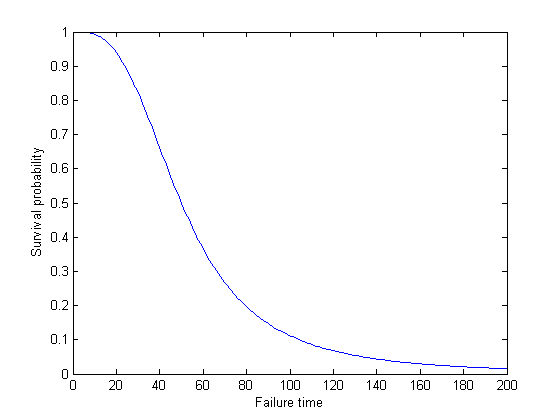

## 2.2-Cumulative distribution function

In probability and statistics, the cumulative distribution function (CDF) of a real random variable X, evaluated at t, is the probability that X will take a value less than or equal to t.
$$F_{X}(t)=\mathbb{P}(X\le t)=1-S(t)$$
Below is the cumulative distribution function of the normal centered reduced distribution:

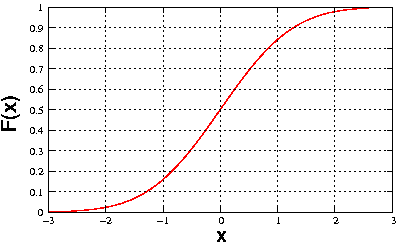

## 2.3-Probability density:

This is the function $f(t)>0$ such that for all $t>0$  
$$\mathbb{P}(a \le X \le b) = \int_a^b f_X(t) $$
Hence, if $F_X$ is the cumulative distribution function of $X$, and that it admits a derivative at the point t then:
$$f(t)=\lim\limits_{h \rightarrow 0} \dfrac{\mathbb{P}(t\le X \ge t+h)}{h}=F'(t)=-S'(t)$$

For $t>0$, the probability density represents the probability of dying in a small interval of time after the instant t.

## 2.4-The hazard rate and the cumulative hazard rate:

The $\textbf{hazard rate}$, $\lambda(t)$, is constructed as the probability that the event occurs in the time interval t knowing that the event has not occurred before, divided by the width of the time interval: $\Delta(t)$

$$\lambda(t)=\lim\limits_{\Delta(t) \rightarrow 0} \dfrac{\mathbb{P}(t\le T<t+\Delta(t)|T\ge t)}{\Delta(t)}$$

With the conditional probability theorem: $\lambda(t)=\dfrac{f(t)}{S(t)}$

The $\textbf{cumulative hazard rate}$ can be defined as: $\Lambda(t)= \displaystyle \int_{0}^{t} \lambda(s) \, \mathrm{d}s$

Thus, we get the following equality between the cumulative hazard rate $\Lambda(t)$ and the survival function $S(t)$:
$$\lambda(t)=\dfrac{f(t)}{S(t)}=\dfrac{-d}{dt}\log(S(t))=-\log S'(t)$$
It implies, $$S(t)=\exp(- \displaystyle \int_{0}^{t} \lambda(s) \, \mathrm{d}s)=\exp(-\Lambda(t))$$  

The hazard function provides a measure of the likelihood of a failure depending on the duration of survival.  An increasing hazard rate could be an effect of natural aging or wear while a decreasing hazard could mirror for example the recovery after a
transplant.

## 2.5-Censoring:

Generally we call, censoring, a problem of missing data. Censoring is very common in survival analysis. There are several types of censoring:

$\textbf{Left censoring}$: An observation is known to be below a certain value but it is unknown by how much.  
$\textbf{Right censoring}$:An observation is known to be above a certain value but it is unknown by how much.  
$\textbf{Interval censoring}$:The event occurred between two measurement intervals but we do not know when in the meantime.  
$\textbf{Type 1 censoring}$:The study stops when a certain time (previously agreed) has elapsed.  
$\textbf{Type 2 censoring}$:The study ends when a fixed number of events has occured.

# II.Nonparametric estimation:

## 1- The Kaplan-Meier estimator:

The Kaplan-Meier estimator estimates the survival function based on lifetime data.  
The idea behind the Kaplan-Meier estimator is to divide the observation time of the study into an interval sum to obtain a separate interval for each death or censoring.


The Kaplan-Meier estimation curve for the survival function makes it possible to approach the real survival function.  
The advantage of the Kaplan-Meier curve is that this method takes into account certain types of censored data (in particular data censored by the right).  
If no truncation or censoring occurs, the Kaplan-Meier curve is equivalent to the survival function.  
For example, in medical statistics, a typical application might involve grouping patients into categories: those with an A gene and those with a B gene. On the graph, patients with a B gene die faster than patients with gene A. After two years, 80% of patients with gene A survive but less than half of patients with gene B survive.  

The Kaplan-Meier estimator requires to have at least two data for each subject studied: The status at the last observation and the delay before the studied event appears.  
However, if the survival functions of the two groups are to be compared, a third data is required, the group assignment of each subject.  

$\textbf{Some formulas for the Kaplan-Meier estimator:}$


We note $S(t)$ the probability that a subject has a lifetime greater than t.  
For a size N sample, the durations observed until each death of the subjects of the sample N are:
$$t_{1}\le t_{2}\le t_{3}\le ... \le t_{N}$$  

Let $d_{i}$ denote the number of events "deaths" at time $t_{i}$ and let $n_{i}$ be the number of subjects called *at risk* before time $t_{i}$.  


For instance, we study **100** tractors. It is assumed that the tractor number **1** fail on day number **3**, machines **2** and **3** fail on day **10** and machine **4** disappears from study (censored data) on day **9**. Then we will have the following table.

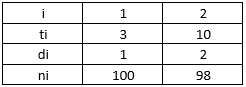

The Kaplan-Meier estimator is the non-parametric maximum likelihood estimate of $S(t)$. It is the following product:
$$\hat{S}(t)=\prod_{t_{i}<t}^n \dfrac{n_{i}-d_{i}}{n_{i}}$$  

-When there is no censoring,$n_{i}$ is the number of survivors before time $t_{i}$  
-When censorship exists,$n_{i}$ is the number of survivors minus the number of censored cases (only survivors continue to be in the study)  

The Kaplan-Meier estimator is a statistic and some estimators are used to approximate its variance. The most commonly used estimator is **the Greenwood formula**:  

$$\hat{V}ar(\hat{S}(t))=\hat{S}(t)^{2} \sum_{t_{i}<t} \dfrac{d_{i}}{n_{i}(n_{i}-d_{i})}$$

## 2-The Nelson-Aaden estimator

The Nelson-Aaden estimator is a non-parametric estimator of the cumulative risk rate function adapted to censored or missing data.  
It allows to estimate the cumulated number of studied events (deaths, failures, etc ...)  
The estimator is given by the following formula:  
$$\hat{\Lambda}(t)=\sum_{t_{i}\le t} \dfrac{n_{i}}{d_{i}}$$

$d_{i}$: Number of events on $t_{i}$

$n_{i}$: Total individuals at risk at $t_{i}$
  
This expression is estimating the hazard at each distinct time of death $t_{i}$ as the ratio of the number of deaths to the number exposed.  
The cumulative hazard up to time t is simply the sum of the hazards at all death times up to t, and has a nice interpretation as the expected number of deaths in $[0, t]$ per unit at risk.  
The variance of $\hat{\Lambda}$ can be approximated by $Var(\log(\hat{\Lambda}(t))$, which is obtained by the Greenwood’s formula.  
Breslow suggested in 1972 estimating the survival function as: $\hat{S}(t)=\exp(-\hat{\Lambda}(t))$

## 3-Other estimators:

## 3.1 The Breslow's estimator:

In 1972 Breslow developed a maximum likelihood estimator for the hazard function. This estimator has been widely used in the extension of the Cox model.  

This cumulative hazard estimator was obtained from the Kaplan-Meier estimator using the following relation: $S(t)=\exp(-\Lambda(t))$  
$$\hat{\Lambda_{2}}(t)=-\log(\hat{S}(t)=\sum_{t_{i}\le t} \log \left(1-\dfrac{d_{i}}{Y_{i}} \right)$$

$d_{i}$: Number of events on $t_{i}$

$n_{i}$: Total individuals at risk at $t_{i}$

The variance of this estimator is:
$$\hat{Var}(\hat{\Lambda_{2}}(t))=\sum_{t_{i}\le t} \dfrac{d_{i}}{n_{i}(n_{i}-d_{i})}$$

## 3.2 The Harrington-Fleming estimator:

Fleming and Harrington gived an estimator nearer to the Kaplan-Meier estimator and smaller than the Breslow estimator for tied data.  

From the relation $S(t)=exp(-\Lambda(t))$ and the Nelson-Aalen estimator we get:
$$\hat{S_{2}}(t)=\exp(-\hat{\Lambda}(t))=\prod_{i:t_{i}<t}^n \exp \left(\dfrac{-d_{i}}{n_{i}} \right)$$

By applying a limited development, we find the Kaplan-Meier estimator.

## 4-The actuarial method:

The actuarial method is based on the same  principle as the estimator of Kaplan-Meier. The difference is that the conditional probabilities are estimated on intervals chosen by the user and not determined by events.  

We consider k time intervals: $[0;t_{1}], [t_{1};t_{2}], ..., [t_{k-1}]$  
$d_{i}$: number of death in the $i^{th}$ interval  
$n_{i-1}$: number of subjects alive at time $t_{i-1}$  
$c_{i}$: number of subjects censored in the $i^{th}$ interval  
$r_{i}$: number of subects at risk in the $i^{th}$ interval

We assume that the censorings are uniformly distributed in each interval.  
The probability of dying in the time interval $[t_{i-1};t_{i}]$ knowing that one was alive at the time $t_{i-1}$ is estimated by $\dfrac{d_{i}}{r_{i}} $  
Thus, the estimator is:  
$$\hat{S_{3}}(t)=\prod_{i:t_{i}<t}^n \left(1-\dfrac{d_{i}}{n_{i}} \right)$$

The Greenwood's formula allows to get the estimation of the variance:  
$$\hat{Var}(\hat{S_{3}})=\hat{S_{3}}(t)^{2} \sum_{t_{i}<t} \dfrac{d_{i}}{r_{i}(r_{i}-d_{i})}$$

## 5-Standard Errors and Confidence Interval: 

The methods previously seen are estimates and should be interpreted as such.  
There are formulas to produce standard errors and confidence interval estimations of the survival probabilities.  
The most known formula to estimate the standar error (s.e) uses the Greenwood formula (previously seen) and is as follow:  
$$S_{e}(S(t))=\hat{S}(t) \sqrt{ \sum_{t_{i}<t} \dfrac{d_{i}}{n_{i}(n_{i}-d_{i})}}$$

Thus, the quantity $1.96 \times S_{e}(S(t))$ corresponds to the margin of error and is used to calculate the 95% confidence intervals: $S(t) \pm 1.96 \times S_{e}(S(t)) $

# III-Simulation on breast cancer data:

We will simulate a survival study to illustrate the interest of the mathematical tools mentioned above.  
We will do this survival analyse in **R** with $100$ observations from the German breast cancer study (**gbcs**). The main purpose will be to explore the data and find what influence breast cancer.

First, we will install the *survival* package, it contains the core survival analysis routines, including definition of Surv objects, Kaplan-Meier and Aalen-Johansen (multi-state) curves, Cox models, and parametric accelerated failure time models.



## 1-Exploring the data:

In [19]:

install.packages("survival", dependencies=TRUE)
install.packages("flexsurv", dependencies=TRUE)


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  impossible d'ouvrir l'URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'survival' is in use and will not be installed"Warning message:
"dependency 'ActuDistns' is not available"Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  impossible d'ouvrir l'URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'flexsurv' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mulot\AppData\Local\Temp\Rtmpiuhc9Y\downloaded_packages


Then we will explore the data with the *summary* function

In [62]:
gbcs <- read.csv("https://ryanwomack.com/data/gbcs.csv");
summary(gbcs)


       id              age          menopause       hormone    
 Min.   :  1.00   Min.   :27.00   Min.   :1.00   Min.   :1.00  
 1st Qu.: 25.75   1st Qu.:47.00   1st Qu.:1.00   1st Qu.:1.00  
 Median : 50.50   Median :54.00   Median :2.00   Median :1.00  
 Mean   : 50.50   Mean   :53.86   Mean   :1.63   Mean   :1.42  
 3rd Qu.: 75.25   3rd Qu.:62.00   3rd Qu.:2.00   3rd Qu.:2.00  
 Max.   :100.00   Max.   :74.00   Max.   :2.00   Max.   :2.00  
   prog_recp        estrg_recp       rectime          censrec    
 Min.   :  0.00   Min.   :  0.0   Min.   :  46.0   Min.   :0.00  
 1st Qu.:  6.00   1st Qu.:  9.0   1st Qu.: 560.2   1st Qu.:0.00  
 Median : 31.50   Median : 32.0   Median :1304.5   Median :1.00  
 Mean   : 89.97   Mean   : 77.1   Mean   :1324.2   Mean   :0.58  
 3rd Qu.:117.50   3rd Qu.: 94.5   3rd Qu.:1989.2   3rd Qu.:1.00  
 Max.   :739.00   Max.   :749.0   Max.   :2563.0   Max.   :1.00  

**Captions**:  
**Id**: Referencing number  
**Age**: Age of the patient  
**Menopause**: Is the patient postmenopausal  
**Hormone**: Dichotomic variable for hormone therapy  
**Prog_recp**: Number of progesteron receptors  
**Estrg_recp**: Number of estrogen recptors  
**Rectime**:Recurrence time until breast cancer recurred  
**Censrec**:Censoring  

As often we can make a correlation matrix to see if there is a significant link between the variables

In [13]:
#correlation matrix
cor(gbcs)

,id,age,menopause,hormone,prog_recp,estrg_recp,rectime,censrec
id,1.000000000,0.02323118,0.07067689,-0.05966129,0.04049627,0.1748444,-0.005059552,-0.08001632
age,0.023231176,1.00000000,0.79581730,0.25719905,0.04123542,0.3217537,0.021608614,0.02838536
menopause,0.070676890,0.79581730,1.00000000,0.14855712,-0.06588442,0.2363330,-0.103430881,0.14519990
hormone,-0.059661288,0.25719905,0.14855712,1.00000000,0.06053413,0.1534863,0.163525476,-0.22003284
prog_recp,0.040496275,0.04123542,-0.06588442,0.06053413,1.00000000,0.4255851,0.286073120,-0.28628077
estrg_recp,0.174844441,0.32175365,0.23633297,0.15348627,0.42558514,1.0000000,0.164942607,-0.19650683
rectime,-0.005059552,0.02160861,-0.10343088,0.16352548,0.28607312,0.1649426,1.000000000,-0.58010969
censrec,-0.080016315,0.02838536,0.14519990,-0.22003284,-0.28628077,-0.1965068,-0.580109691,1.00000000


We note that age and menopause variables are correlated, which is not surprising since menopause appears with age.  
However, this matrix does not bring us any more information.

## 1.1- Censored data:
Now we will use the *surv* function to link the censored data with the recurrence time. Then we will use the command *recsurv* and a **+** indicates the censored data.

In [22]:
library(survival)
recsurv<-Surv(rectime,censrec)
print(recsurv)

  [1] 1337  1420  1279   148+ 1863+ 1933+  358  2372  2563+ 2372+ 1989   579 
 [13] 1043  2234+ 2297+ 2014+  518  1763   889   357   547  1722+ 2372+  251 
 [25] 1959+ 1897+  348   275  1329  1193   698   436   552  2551+  754   819 
 [37] 1280   663+  722   322+ 1150   446  1855+  238  1838+ 1826+ 2353+ 2471+
 [49]  893  2093   740+  632  1866+  491  1918    72  2556+ 1753   417   956 
 [61] 1846+ 2449+ 2286   456   536   612  2034  1990  1976+ 2539+ 2467+  876 
 [73] 2132+  426   537  2217+  296+ 2320+  795   867   755  1388  1387   535 
 [85] 1653+ 1904+ 1868+ 1767+  855  1157  2380+ 1679   498  2138+ 2175+  563 
 [97]   46+ 2144+  344   945+


Now we can see that the first observation has a recurrence time of $1337$ days and is not censored but the fourth patient left the study on the $148^{th}$ day, thi data is censored. 

## 2- The Kaplan-Meier estimator:
This division of censored and uncensored data will allow us to plot the survival function of the recurrence time using the Kaplan-Meier estimator.

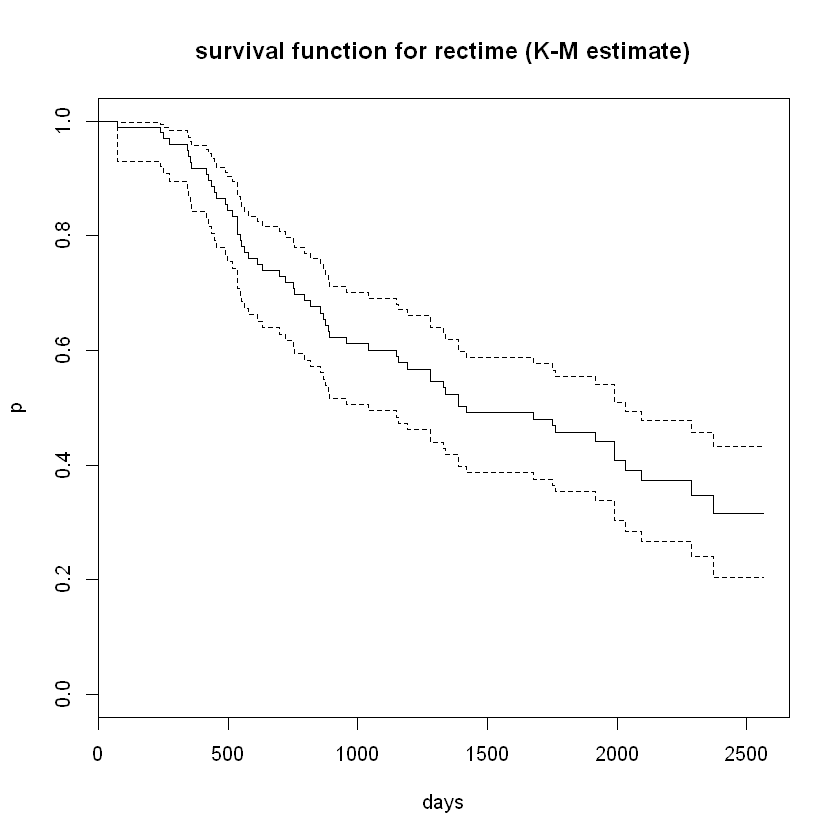

In [25]:
fit_KM <- survfit(recsurv~1,type="kaplan-meier", conf.type="log-log")
plot(fit_KM, main="survival function for rectime (K-M estimate)", xlab="days", ylab="p")

At the beginning of the study, all the patients do not have a recurrence of breast cancer, after $500$ days it is $90$% of the patients and after $2500$ days it drops to $35$% of the patients.  
## 2.1- The cumulative hazard function:  
We can also observe the risk of recurrence of breast cancer the cumulative hazard function, we use the command *cumhaz*. 

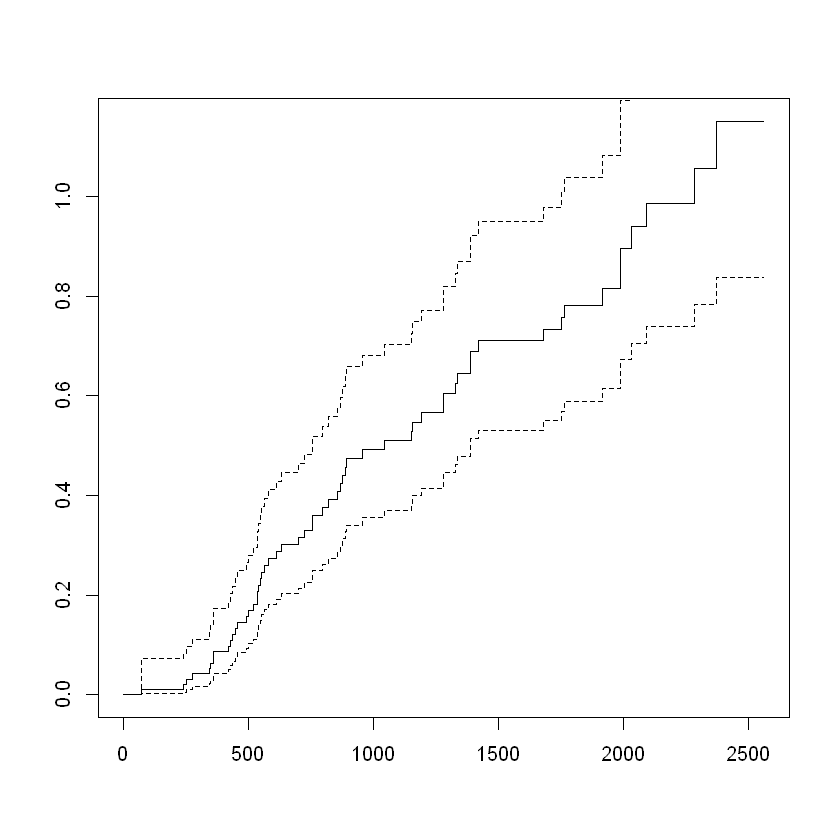

In [26]:
plot(fit_KM, fun="cumhaz")

## 3- Observe the impact of the variables:
With the *surfit* function we will be able to illustrate the impact of the variables on the survival function.  
We will only study the impact of the number of hormone receptors (progesterone and estrogen) on the survival function.  
The population is divided into two categories: those with many hormone receptors and those with fewer hormones. For this we use the median.

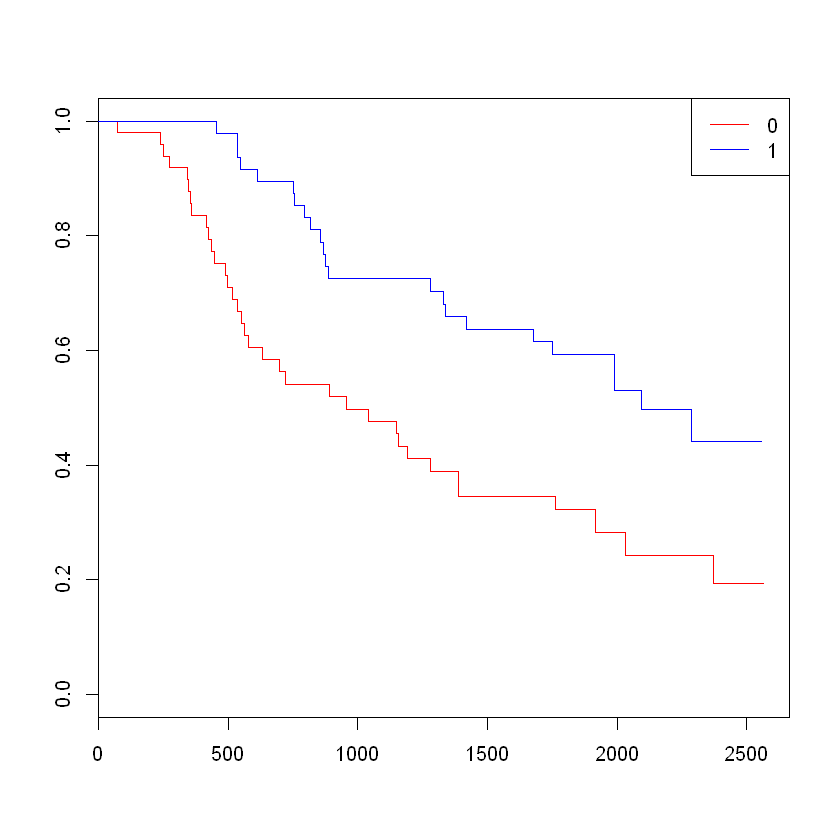

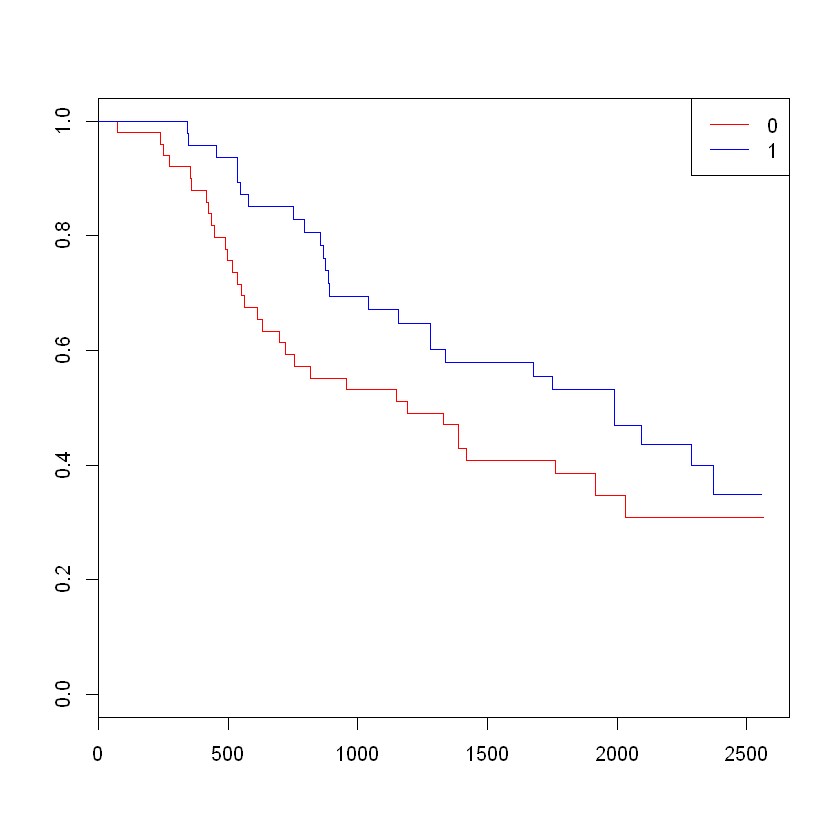

In [30]:
fit <- survfit(recsurv~as.numeric(prog_recp>median(prog_recp)))
plot(fit, col=c(2,4))
legend("topright",leg.txt,col=c(2,4),lty=1)

fit <- survfit(recsurv~as.numeric(estrg_recp>median(estrg_recp)))
plot(fit, col=c(2,4))
legend("topright",leg.txt,col=c(2,4),lty=1)

We can observe that the patients with more hormone receptors (blue curve) have a better chance of survival.

## 4- Fitting a distribution:
In survival analysis, we often try to find a known distribution that corresponds to the survival function.  
To check which distribution fit the best to our model we will use the command *survreg*.


In [31]:
fit_exp<-survreg(recsurv~1, dist="exponential")
fit_weibull<-survreg(recsurv~1, dist="weibull")
fit_gauss<-survreg(recsurv~1, dist="gaussian")
fit_logistic<-survreg(recsurv~1, dist="logistic")
fit_lognormal<-survreg(recsurv~1, dist="lognormal")
fit_loglogistic<-survreg(recsurv~1, dist="loglogistic")
summary(fit_exp)
summary(fit_weibull)
summary(fit_gauss)
summary(fit_logistic)
summary(fit_lognormal)
summary(fit_loglogistic)


Call:
survreg(formula = recsurv ~ 1, dist = "exponential")
            Value Std. Error    z      p
(Intercept) 7.733      0.131 58.9 <2e-16

Scale fixed at 1 

Exponential distribution
Loglik(model)= -506.5   Loglik(intercept only)= -506.5
Number of Newton-Raphson Iterations: 4 
n= 100 



Call:
survreg(formula = recsurv ~ 1, dist = "weibull")
             Value Std. Error     z      p
(Intercept)  7.667      0.108 71.31 <2e-16
Log(scale)  -0.230      0.113 -2.03  0.043

Scale= 0.795 

Weibull distribution
Loglik(model)= -504.7   Loglik(intercept only)= -504.7
Number of Newton-Raphson Iterations: 5 
n= 100 



Call:
survreg(formula = recsurv ~ 1, dist = "gaussian")
               Value Std. Error    z      p
(Intercept) 1688.859    125.598 13.4 <2e-16
Log(scale)     7.000      0.101 69.4 <2e-16

Scale= 1096 

Gaussian distribution
Loglik(model)= -520.1   Loglik(intercept only)= -520.1
Number of Newton-Raphson Iterations: 5 
n= 100 



Call:
survreg(formula = recsurv ~ 1, dist = "logistic")
               Value Std. Error    z      p
(Intercept) 1640.760    132.060 12.4 <2e-16
Log(scale)     6.530      0.107 61.0 <2e-16

Scale= 685 

Logistic distribution
Loglik(model)= -522.9   Loglik(intercept only)= -522.9
Number of Newton-Raphson Iterations: 4 
n= 100 



Call:
survreg(formula = recsurv ~ 1, dist = "lognormal")
             Value Std. Error     z      p
(Intercept) 7.3195     0.1213 60.33 <2e-16
Log(scale)  0.0547     0.1004  0.54   0.59

Scale= 1.06 

Log Normal distribution
Loglik(model)= -501.3   Loglik(intercept only)= -501.3
Number of Newton-Raphson Iterations: 5 
n= 100 



Call:
survreg(formula = recsurv ~ 1, dist = "loglogistic")
             Value Std. Error     z      p
(Intercept)  7.307      0.119 61.52 <2e-16
Log(scale)  -0.466      0.109 -4.27  2e-05

Scale= 0.627 

Log logistic distribution
Loglik(model)= -502.5   Loglik(intercept only)= -502.5
Number of Newton-Raphson Iterations: 4 
n= 100 


The log-normal distribution fits the best with our model:

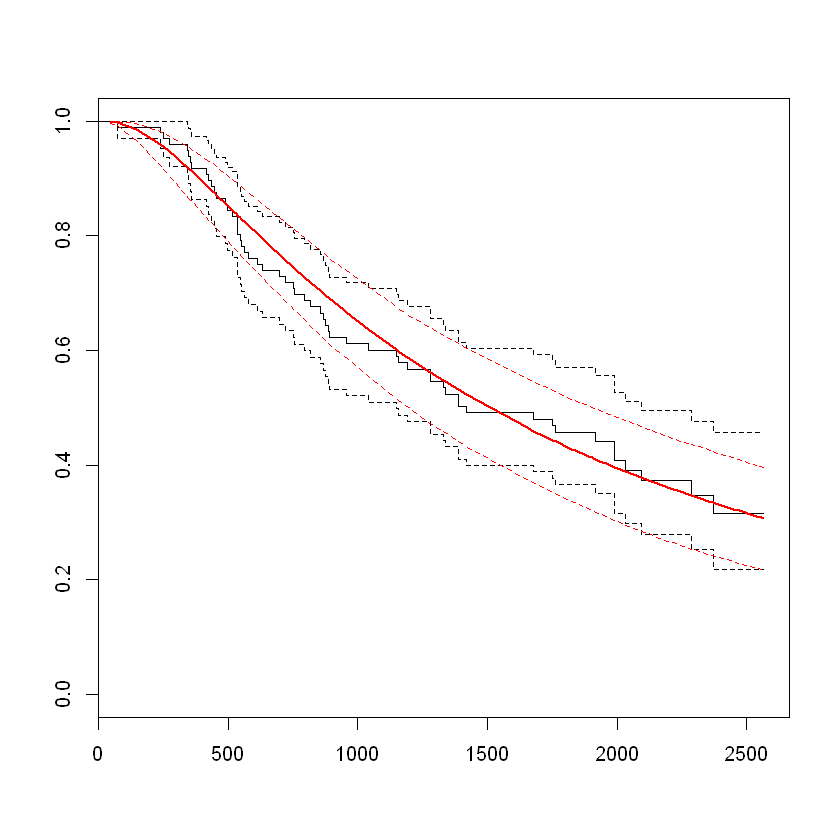

In [61]:
library(flexsurv)
fit_lognormal<-flexsurvreg(recsurv~1, dist="lnorm")
plot(fit_lognormal)

# IV-Semi-parametrics models: The cox proportional hazard model

## 1-Proportional hazard models:

These models express a multiplicative effect of the various covariates on the hazard function. We introduce a baseline hazard function that gives the general form of chance and which is common to all individuals.  
The proportional hazards models are characterized by the following relation:
$$\forall t>0, \lambda(t)=\lambda_{0}(t)h(\beta,X)$$

$X$ is the covariate vector  
$\beta$ is the parameter of interest  
$h$ is a positive function  


The hazard function is the product of a function that depends only on time and a function that does not depend on it.  
This kind of model is called a $\mathbf{proportional}$ $\mathbf{model}$ because for two different subjects i and j of covariates $X_{i}$ and $X_{j}$, the ratio of their hazard functions does not depend on time.  
Moreover, if $\lambda_{0}$ and/or $h$ are unknown, the model is called $\mathbf{semi-parametric}$.


## 2-Definition of the Cox Model:

The Cox proportional hazards regression model the hazard rate is defined by
$$h_{i}(t)=h_{0}(t) \exp(\beta_{1}x_{i1}+...+\beta_{k}x_{ik})$$

where $x = (x_{1},..., x_{k})$ is the vector of predictors and $\beta=(\beta_{1},..,\beta_{k})$ is the vector of unknown coefficients that we want to estimate. The factor $h_{0}(t)$ is the baseline hazard function. This correspond to the hazard rate when all predictors are equals to zero.  
Thus, this model is semi-parametric since the baseline hazard function can take any form.

We will consider, now, two cases i and j that differ in their x-values:
$$\eta_{i}=\beta_{1}x_{i1}+...+\beta_{k}x_{ik}$$
$$\eta_{j}=\beta_{1}x_{j1}+...+\beta_{k}x_{jk}$$
The hazard ratio is this case is independant of time:  
$$\dfrac{h_{i}(t)}{h_{j}(t)}=\dfrac{h_{0}(t)\exp(\eta_{i})}{h_{0}(t)\exp(\eta_{j})}=\dfrac{\exp(\eta_{i})}{\exp(\eta_{j})}$$
Consequently, the Cox model is a proportional-hazards model.  

## 3-Interpretation of the coefficients:

In the case where X is a dichotomous variable which takes the values $0$ or $1$ according to the absence or the presence of the characteristic considered.  
The ratio of the instantaneous risk of the subjects of the class 1 compared to the class 0 is:
$$\dfrac{h(t,1)}{h(t,0)}=e^{\beta}$$
The $\beta$ coefficient is therefore the logarithm of the relative instantaneous risk of class $1$ with respect to class $0$.
In general, the $\beta$ coefficients represent the effect of the characteristic $X_{j}$ and the occurrence of the event.  
If $\beta_{j}$ is zero, the $j^{th}$ characteristic has no influence on the event considered. If $\beta^{j}$ is positive and if two subjects differ only in the $j^{th}$ characteristic, high values of the $j^{th}$ characteristic are associated with a higher instantaneous risk.
Conversely, if $\beta_{j}$ is negative, high values of the $j^{th}$ characteristic are associated with a lower instant risk.

For example, let a covariate $X_ {j}$ which can take two values: $0$ if the person takes the treatment $A$ or $1$ if it is the treatment $B$. We take as reference the persons who take the treatment $A$ , then the coefficient $\beta _ {j}$ is the relative risk (instant risk of death) associated with treatment $B$ over treatment $A$.  
In other words, individuals taking treatment $B$ have an instant risk of death  $\exp \left(\beta_{j} \right)$ times that of individuals taking treatment $A$.

## 4-Estimation and test:

The principle for the Cox model is to estimate the coefficients $\beta_{j}$. We do not try to estimate $\lambda_{0}(t)$.  
The estimators of $ \beta_{j} $ are obtained by the maximum likelihood method. More exactly, only the part of the likelihood who  contains the information on the coefficients $ \beta_{j} $ is used for calculations. This is called the $\textbf{cox}$ $\textbf{partial}$ $\textbf{likelihood}$.  
We test the hypothesis $ H_ {0} $ that the vector $ \beta = (\beta_{1}, ...,\beta_{k}) $ is equal to zero. It is possible to use three tests: the score test, the Wald test and the likelihood ratio test.

## 4.1- Cox partial likelihood: 
The idea is that no information can be given about $\beta$ by the intervals during which no event has taken place, because $\lambda_{0}$ is none in these intervals.  
We then work on the moments when the studied event occurs.  

$\textbf{Untied}$ $\textbf{times}$: To begin, we will assume that there is only one event at each interval time.  
As in section II, we denote $t_{1}<t_{2}<...<t_{m}$ the observed distinct times of "death".  
Let $R_{i}$ is the set of subjects that are at risk just before time $t_{i}$  
We call $j_{(i)}$ the subject who fail at time $t_{i}$.  
The conditional probability that this subject would fail at $t_{i}$ is given by the following formula:  
$$\dfrac{\lambda_{0}(t_{i}) \exp \left(\beta X_{j_{(i)}} \right) }{\sum_{i\in R_{i}} \lambda_{0} \left(t_{i} \right) \exp \left(\beta X_{j} \right)}$$
The baseline hazard cancels, so the probability is:  
$$\dfrac{\exp \left( \beta X_{j_{(i)}} \right)}{\sum_{i\in R_{i}} \exp \left(\beta X_{j} \right) }$$
This probability only depends on the parameter $\beta$.  

Since there are contributions at each time of death, the partial likelihood of Cox is defined as the following product:  
$$ L=\prod_{i \in R_{i}}^m  \dfrac{\exp \left( \beta X_{j_{(i)}} \right)}{\sum_{i\in R_{i}} \exp \left(\beta X_{j} \right) }$$
In his original paper Cox called this a "conditional likelihood" because it is a product of conditional probabilities,
but later abandoned the name because L is not itself a conditional probability.  
L is neither a likelihood in a statistical meaning, but it behaves as such, therefore Cox proposed calling L a partial likelihood.  

$\textbf{Tied}$ $\textbf{times}$: The previous reasoning assumes distinct event times. In the case of real data, this hypothesis is not always verified.  
When it occurs several events, the exact method consists to admit that the events appear one after the other.  
However, we do not know in which order, we must consider all possibilities.
For example, in the case of two subjects $s_{1}$ and $s_{2}$ of characteristics $X_{1}$ and $X_{2}$ which die in $T_{i}$.  
The exact likelihood would be:
$$\dfrac{\exp \left( \beta X_{1} \right) \exp \left( \beta X_{2} \right)}{\sum_{i\in R_{i}} \exp \left(\beta X_{j} \right) \times \sum_{i\in R_{i} \backslash s_{1}} \exp \left(\beta X_{j} \right)} + \dfrac{\exp \left( \beta X_{1} \right) \exp \left( \beta X_{2} \right)}{\sum_{i\in R_{i}} \exp \left(\beta X_{j} \right) \times \sum_{i\in R_{i} \backslash s_{2}} \exp \left(\beta X_{j} \right)}$$

The problem with this method is that the calculation time becomes very long when there is many simultaneous events. Therefore, several approximated partial likelihood functions have been developped: The Breslow's method in 1974, the Efron's method in 1977, and the Kalbfleisch and Prentice's method in 1973.  
According to Hertz-Picciotto and Rockhill, in most scenarios the Efron approximation is the best method.

## 4.2-Tests:

We often want to check some hypothesis about the regression coefficients. The tests, deduced from the asymptotic properties of $\beta$, are often based on the hypothesis: $H_{0}: \beta = \beta_{0}$  
The following three statistics are used:  

## 4.2.1- The Wald test: 
This test assess the constraints based on the squared difference between the estimated and hypothesized parameter values.  
In large samples $\hat{\beta}$ has a multivariate normal distribution with mean $\beta$ and the covariance matrix $var(\beta)=I^{-1}(\beta)$. Thus, under $H_{0}: \beta = \beta_{0}$, the quadratic form:  
$$(\hat{\beta}-\beta_{0})' var^{-1}(\hat{\beta})(\hat{\beta}-\beta_{0}) \longrightarrow \chi^{2}_{p}$$
p is the dimension of $\beta$

## 4.2.2-The likelihood ratio test:  
In statistics, a likelihood-ratio test is a statistical test used for comparing the goodness of fit of two statistical models, a null model (representing the null hypothesis) against an alternative model (representing an alternative hypothesis). So we use the following statistic:  
$$\chi^{2}_{L}=2 \left( \log(L_{p}(\hat{\beta})) - \log(L_{p}(\beta_{0}))\right)$$
It is a chi-square distribution with p degrees of freedom for large samples

## 4.2.3- The score test:  
The basic idea behind the score test, also known as the Lagrange multiplier test, is that if the restricted estimator is near the maximum of the likelihood function, the gradient of the likelihood function, known as the score function, evaluated at the restricted estimator should be close to zero, and can be shown to asymptotically follow a normal distribution with mean zero and known variance.  
The score test is based on the scores, $U(\beta)=\dfrac{\partial \log L_{p}(\beta \mid x)}{\partial \beta}$. For large samples $U(\beta)$ has a p-variate normal distribution with mean $0$ and covariance matrix $I(\beta)$ under $H_{0}: \beta=\beta_{0}$. Hence, the test statistic: 
$$U(\beta_{0})'I^{-1}(\beta_{0})U(\beta_{0}) \longrightarrow \chi^{2}_{S}$$  

These three tests follow, under $H_{0}$, a chi square distribution of p degrees of freedom (p is the dimension of the vector $\beta$). The advantage of the likelihood ratio test is that it does not require to calculate the second derivatives of the log-likelihood and the advantage of the score test is that it does not require to estimate $\hat{\beta}$.

## 5- Extensions of the model:

## 5.1-Time-varying covariates

One of the strengths of the Cox model is its ability to take in covariates that change over time. Nevertheless, $X_{t}$ must be known at time $t$.  
The practical reason that time-dependent covariates work is based on the underlying way in which the Cox model works: at each event time the program compares the current covariate values of the subject who had the event to the current values of all others who were at risk at that time.  
An example of time dependent covariates can be the study of a treatment who vary with time: e.g. a drug may be very effective if administered within one month and become less effective as time goes on. The hypothesis of no change with time of the coefficient may then be tested.  

In this case the statistics of the Cox model are identical nevertheless, we can make the following remarks:  
-It is necessary to know the value of the covariates for each event time.  
-The interpretation becomes diffcult because the risk is specific to each covariate.  
-The proportional hazard hypothesis is preserved. Indeed, hazard functions for the different covariates remain proportional and their ratios are independent of time. The effect of the covariate does not change during the time, it is the variable that varies.  
-One use of time-varying covariates is to check the assumption of proportionality of hazards

## 5.2- Stratified Cox model:

In the case where a qualitative variable does not satisfy the hypothesis of proportional hazards, we can consider a stratified Cox model.  
For example, in colon cancer, stage II and stage III diseases have different prognosis. In a therapeutic study, we may expect similar amount of improvement by using a new treatment, but the baseline hazard for stage II and III cancer should be allowed to be different.  
The partial likelihood is calculated in each strata and the total likelihood is the product of the likelihoods of each strata.
The stratified Cox model assumes that the X covariates act in the same way in each strata.

## 5.3- The frailty model:

The Cox model assumes that the population is homogeneous. Nevertheless, this hypothesis is not always realistic, especially when important covariates are not observable or are unknown.  
The Frailty models make it possible to take into account the heterogeneity of the observations. The idea is to suppose that different patients possess different frailties and patients more ”frail” tend to have the event earlier that those who are less frail. 

Let $X_{0}$ be a new unobserved covariate. We assume, that the effect of the covariates is a real quantity $\exp(\beta_{0}X_{0})$, then the hazard function is:  
$$\lambda (t|X, X_{0})= \lambda_{0}(t) \exp(\beta_{0} X_{0}) \exp(\beta X)$$
We note $\omega=\exp(\beta_{0}Z_{0})$ the positive covariate called the "frail".  
The conditionnal survival function is:
$$S(t|X,\omega)=\exp(- \displaystyle \int_{0}^{t} \lambda(s) \omega e^{\beta X} \, \mathrm{d}s)=\exp(- \omega e^{\beta X} \Lambda(t)) $$

# V- Compute the Cox model in R: Simulation on lung cancer data

## 1-Exploring the data:

In [36]:
install.packages(c("survival", "survminer"))

also installing the dependencies 'ggrepel', 'ggsci', 'cowplot', 'ggsignif', 'exactRankTests', 'km.ci', 'ggpubr', 'maxstat', 'survMisc', 'cmprsk'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  impossible d'ouvrir l'URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'survival' is in use and will not be installed"

package 'ggrepel' successfully unpacked and MD5 sums checked
package 'ggsci' successfully unpacked and MD5 sums checked
package 'cowplot' successfully unpacked and MD5 sums checked
package 'ggsignif' successfully unpacked and MD5 sums checked
package 'exactRankTests' successfully unpacked and MD5 sums checked
package 'km.ci' successfully unpacked and MD5 sums checked
package 'ggpubr' successfully unpacked and MD5 sums checked
package 'maxstat' successfully unpacked and MD5 sums checked
package 'survMisc' successfully unpacked and MD5 sums checked
package 'cmprsk' successfully unpacked and MD5 sums checked
package 'survminer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mulot\AppData\Local\Temp\Rtmpiuhc9Y\downloaded_packages


In [40]:
library("survival")
library("survminer")

We will use the lung cancer dataset  implemented in the "survival" package. It is a dataset of survival data of 228 patients with advanced lung cancer from the North Central Cancer Treatment Group.

In [41]:
data("lung")
head(lung)

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
3,306,2,74,1,1,90,100,1175,NA
3,455,2,68,1,0,90,90,1225,15
3,1010,1,56,1,0,90,90,NA,15
5,210,2,57,1,1,90,60,1150,11
1,883,2,60,1,0,100,90,NA,0
12,1022,1,74,1,1,50,80,513,0


$\textbf{Captions}:$  
$\textbf{inst}$: Institution code  
$\textbf{time}$: Survival time in days  
$\textbf{status}$: censoring status 1=censored, 2=dead  
$\textbf{age}$: Age in years  
$\textbf{sex}$: Male=1 Female=2  
$\textbf{ph.ecog}$: ECOG performance score (0=good 5=dead) it determines the ability of the patient to tolerate therapies in serious illness.  
$\textbf{ph.karno}$: Karnofsky performance score (the Karnofsky scale runs from 100 to 0, where 100 represents full health and 0 death) rated by physician.   
$\textbf{pat.karno}$: Karnofsky performance score as rated by patient  
$\textbf{meal.cal}$: Calories consumed at meals  
$\textbf{wt.loss}$: Weight loss in last six months  

## 2- The coxph function:
We will use the *coxph* function to compute the Cox proportional hazards regression model.  
The simplified format is as follow:

coxph(formula, data, method)  

-**formula**: a formula object, with the response on the left of a ~ operator, and the terms on the right. The response must be a survival object as returned by the Surv function.  
-**data**: a data.frame in which to interpret the variables named in the formula.  
-**method**: is used to specify how to handle ties. The default is ‘efron’. Other options are ‘breslow’ and ‘exact’. The default ‘efron’ is generally preferred to the once-popular “breslow” method. The “exact” method is much more computationally intensive.


We are interested in the covariate sex so we will fit the cox regression on this covariate:

In [43]:
res.cox <- coxph(Surv(time, status) ~ sex, data = lung)
summary(res.cox)

Call:
coxph(formula = Surv(time, status) ~ sex, data = lung)

  n= 228, number of events= 165 

       coef exp(coef) se(coef)      z Pr(>|z|)   
sex -0.5310    0.5880   0.1672 -3.176  0.00149 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

    exp(coef) exp(-coef) lower .95 upper .95
sex     0.588      1.701    0.4237     0.816

Concordance= 0.579  (se = 0.022 )
Rsquare= 0.046   (max possible= 0.999 )
Likelihood ratio test= 10.63  on 1 df,   p=0.001
Wald test            = 10.09  on 1 df,   p=0.001
Score (logrank) test = 10.33  on 1 df,   p=0.001


We will interpret the results of this Cox regression:

$\textbf{Statistical}$ $\textbf{significance}$: The column marked “z” gives the Wald statistic value also called Z-score. It corresponds to the ratio of each regression coefficient to its standard error $z = \dfrac{coef}{se(coef)}$.  
The Wald test (also called the Wald Chi-Squared Test) is a way to find out if explanatory variables in a model are significant.  “Significant” means that they add something to the model; variables that add nothing can be deleted without affecting the model in any meaningful way.  
The wald statistic evaluates, whether the $\beta$ coefficient of a given variable is significantly different from $0$.  
If the Wald test shows that the parameters for certain explanatory variables are zero, we can remove the variables from the model. On the contrary, if the test shows the parameters are not zero, we should include the variables in the model.  
From the output above (z=-3.176), we can conclude that the variable sex have highly statistically significant coefficients.  

$\textbf{The}$ $\textbf{regression}$ $\textbf{coefficients}$: The second feature to note in the Cox model results is the the sign of the regression coefficients (coef):  
The coefficients in a Cox regression relate to hazard; a positive coefficient indicates a worse prognosis and a negative coefficient indicates a protective effect of the variable with which it is associated.
The variable sex is dichotomic: $1$ for male, $2$ for female.  
The R summary for the Cox model gives the hazard ratio (HR) for the second group relative to the first group, that is, female versus male. The beta coefficient for sex = $-0.53$ indicates that females have lower risk of death (lower survival rates) than males, in these data.  

$\textbf{The}$ $\textbf{Hazard}$ $\textbf{ratios}$: The exponentiated coefficients $exp(coef) = exp(-0.53) = 0.59$, also known as hazard ratios.  
The hazard ratio compares two treatments. If the hazard ratio is $2.0$, then the rate of deaths in one treatment group is twice the rate in the other group.   
So in our dataset, being female (sex=$2$) reduces the hazard by a factor of $0.59$, or $41$%. Being female is associated with good prognostic.  

$\textbf{Confidence}$ $\textbf{intervals}$ $\textbf{of}$ $\textbf{the}$ $\textbf{hazard}$ $\textbf{ratios}$: The labels lower $0.95$ and upper $0.95$ give us the $95$% confidence interval of the hazard ratio. In this case, the hazard ratio $\in [0.4237;0.816]$ with a confidence of $95$%.

$\textbf{Global}$ $\textbf{statistical}$ $\textbf{significance}$ $\textbf{of}$ $\textbf{the}$ $\textbf{model}$:  
The three tests we mentioned earlier (the likelihood ratio test, the Wald test and the score test) give us the significance of the model: These tests evaluate the null hypothesis that all of the betas ($\beta$) are $0$.  
These three methods are asymptotically equivalent. For large enough N, they will give similar results. 
Since the p-value of these test is lower than $0.05$ ($p-value=0.001$) we reject the null hypothesis, the covariate sex is significant.

## 3-Multivariate Cox regression analysis:

Now we will do the same analysis as before but with three covariates: the age, the sex and ph.ecog (ECOG scale runs from 0 to 5, with 0 denoting perfect health and 5 death)

In [47]:
res.cox <- coxph(Surv(time, status) ~ age + sex + ph.ecog, data =  lung)
summary(res.cox)

Call:
coxph(formula = Surv(time, status) ~ age + sex + ph.ecog, data = lung)

  n= 227, number of events= 164 
   (1 observation deleted due to missingness)

             coef exp(coef)  se(coef)      z Pr(>|z|)    
age      0.011067  1.011128  0.009267  1.194 0.232416    
sex     -0.552612  0.575445  0.167739 -3.294 0.000986 ***
ph.ecog  0.463728  1.589991  0.113577  4.083 4.45e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

        exp(coef) exp(-coef) lower .95 upper .95
age        1.0111     0.9890    0.9929    1.0297
sex        0.5754     1.7378    0.4142    0.7994
ph.ecog    1.5900     0.6289    1.2727    1.9864

Concordance= 0.637  (se = 0.026 )
Rsquare= 0.126   (max possible= 0.999 )
Likelihood ratio test= 30.5  on 3 df,   p=1e-06
Wald test            = 29.93  on 3 df,   p=1e-06
Score (logrank) test = 30.5  on 3 df,   p=1e-06


The p-value for all three overall tests (likelihood, Wald, and score) are highly significant ($p-value=1 \times 10^{-6}$), indicating that the model is significant.   

**Sex**: The p-value for this covariate is equal to $0.000986$, as indicated by the significante code this covariates is highly significante. The hazard ratio is almost equal to $0.58$, that means that being a female reduce the hazard by $1-0.58=42)$%.  

**Ph.ecgo**: The p-value for this covariate is equal to $4.45 \times 10^{-5}$ and its hazard ratio is equal to $1.59$, thus there is a strong relationship between the ph.ecog value and increased risk of death.  

**Age**: The p-value of this covariate is greater than $0.05$ ($p-value=0.23$) and the hazard ratio is equal to $exp(coef) = 1.01$, with a $95$% confidence interval of $0.99$ to $1.03$. The confidence interval for HR includes $1$, it indicates that age is not a significante covariate.

## 4- Visualizing the estimated distribution of survival times: 

We can visualize the estimated distribution of survival times thanks to the function survfit() that estimates the survival proportion, by default at the mean values of covariates.

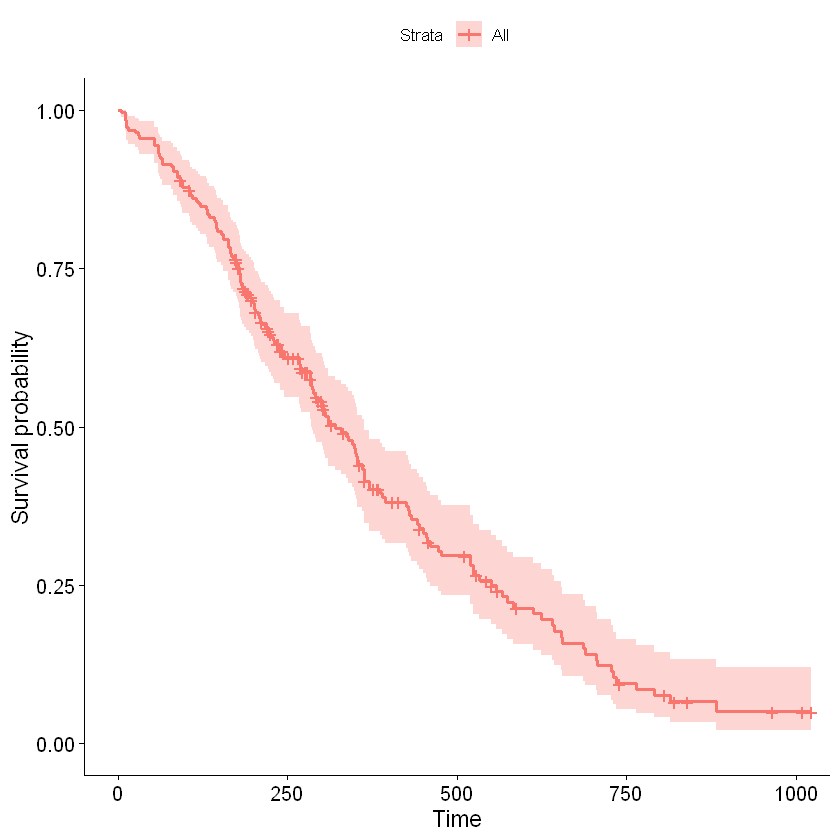

In [57]:
# Plot the baseline survival function
res.cox <- coxph(Surv(time, status) ~ age + sex + ph.ecog, data =  lung)
ggsurvplot(survfit(res.cox), data=lung)

After 500 days of observation, the survival probability dropped to $30$%

Now we want to see the impact of sex on the probability of survival. We separate the data into two categories, male and female, the other covariates are fixed to their average values (if they are continuous variables) or to their lowest level (if they are discrete variables). 

In [54]:
sex_df <- with(lung,
               data.frame(sex = c(1, 2), 
                          age = rep(mean(age, na.rm = TRUE), 2),
                          ph.ecog = c(1, 1)
                          )
               )

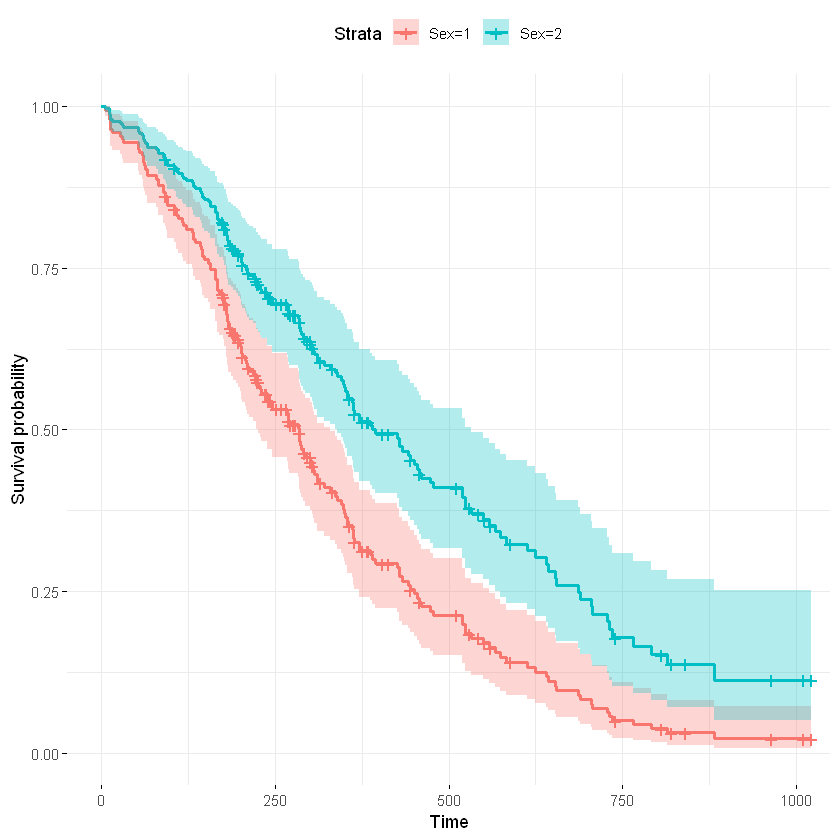

In [56]:
fit <- survfit(res.cox, newdata = sex_df)
ggsurvplot(fit,data=sex_df, conf.int = TRUE, legend.labs=c("Sex=1", "Sex=2"),
           ggtheme = theme_minimal())

As we have seen in previous analyzes, the probability of survival is higher for women (blue curve).

# VI- The parametrics distributions:

## 1- The Exponential distribution.

The exponential distribution depends only on a parameter $\theta$ and is the only one that admits a constant instant risk
The exponential distribution is "memoryless". This property is mathematically translated by:
$$\forall s,t \geq 0  , \mathbb{P}(T>s+t)=\mathbb{P}(T>s)$$
In other words, the fact that a subject has not declared the event for a time t does not change the probability that he declares it from time t.
Thus, the exponential distribution is an efficient model for the duration of an electronic component.  
For example, the probability that a component still works 3 years, knowing that it has already worked a year is simply equal to the probability that it runs two years: there is no usury during the first year.  
The functions associated with this distribution are:  
$$f(t|\theta)=\theta e^{-\theta t}$$
$$\lambda(t|\theta)=\theta$$
$$S(t|\theta)=e^{-\theta t}$$


## 2- The Weibull distribution:

With the exponential survival function, the probability of failure is the same in all time intervals, but when a model with a constant risk rate is not appropriate, other distributions must be used. 
For instance the risk rate can increases with time, which is the case of certain diseases (breast cancer).
The distribution of Weibull is then more adapted, its survival function is defined by:
$$$$
$$S(t|\theta, \nu)=\exp^{- \left(\dfrac{t}{\theta} \right)^{\nu}}$$
$$\lambda(t|\theta,\nu)=\nu \left( \dfrac{1}{\theta} \right)^{\nu}t^{\nu-1}$$
$$S(t|\theta,\nu)=\exp \left(- \left( \dfrac{t}{\theta} \right)^{\nu} \right)$$
The Weibull distribution can modelise a serial system (The system fails when one of its component fails).

## 3-The Gamma distribution:
The gamma distribution is used to modelise waiting time in queuing theory or it can also be used in medicine (the age distribution of cancer).  
$$f(t|\nu,\theta)=\dfrac{\theta^{\nu}}{\Gamma(\nu)}t^{\nu-1}e^{-t\theta}$$
$$F(t|\nu,\theta)=\dfrac{1}{\Gamma(\nu)}\displaystyle \int_{0}^{\theta t} u^{\nu-1} e^{-u}, \mathrm{d}u$$
$$\lambda(t|\nu,\theta)=\dfrac{f(t|\theta,\nu)}{1-F(t|\theta,\nu)}$$

## 4-Other parametrics distributions:

The following distributions: Normal , log-normal and log-logistic are other survival functions.  
-The log-normal distribution is used to is used to model a large number of small independent factors.  
-The log-logistic distribution is used when the risk rate increases and then decreases as cancer mortality before and after treatment.  